# Analysis of correlation between FinBERT polarity scores and key economic indicators at specific time periods

A preliminary finding that Team 7 found from analysis was that there is only a very slight correlation between BoE speech sentiment and some key economic indicators. A comment helpfully provided by the Client (Bank of England) at this point was that it would be interesting to identify whether there are changes in the level of correlation, depending on the monetary policy regime at that time. 

The two key monetary policy regimes the team focused on were: 
- Base rate nearing the Effective Lower Bound (Between 5th March 2009 - 4th May 2022) also referred to as 'ELB' in the markdown below.
- The BoE implementingT a hiking cycle (Between 5th May 2022 - 31st December 2022 (end of our dataset))

As a control, the team also created a heatmap of correlations for the entire dataset period of 1999 - 2022 also to be able to compare and contrast between the three date ranges. 

See coding performed below which prepares the data and visualises the information in line with the above objective. 

In [1]:
# Imports
import numpy as np
import pandas as pd
import os
import warnings
import datetime

# Supress warnings
warnings.filterwarnings('ignore')

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Create user defined function for import and checking
def import_and_check(file_path):
    # Import limited to csv and xlsx given provided data
    data = (
        pd.read_csv(file_path) 
        if file_path.endswith('.csv') 
        else pd.read_excel(file_path))

    # Check for missing values
    missing_values = data.isnull().sum()

    # Display shape and data types
    print(data.shape)
    print(' ')
    print(data.dtypes)
    print(' ')
    
    # Display missing values
    print(missing_values)

    # Check for duplicate records
    duplicate_records = data[data.duplicated()]
    
    # Display duplicate records
    if not duplicate_records.empty:
        print('\nDuplicate Records:')
        display(duplicate_records)
    else:
        print('\nNo Duplicate Records Found.')

    # Display head and tail for headers, 
    # footers, and to confirm data loaded successfully
    display(data.head())
    display(data.tail())
    
    return data

In [3]:
# List all files in the working directory
files = ['all_data.csv']

# Create a dictionary to store dataframes
dataframes = {}

# Iterate over each file
for file_name in files:
    # Don't attempt to self-import the J-notebook!
    if not file_name.endswith('.ipynb'):
        # Remove the file extension
        name_without_extension = os.path.splitext(file_name)[0]
        print(f"\nSummary for file: {file_name}")
        # Import and check data, and store in the dictionary with the filename as key
        dataframes[name_without_extension] = import_and_check(file_name)

# Extract dataframes and assign them to individual variables
for df_name, df in dataframes.items():
    globals()[df_name] = df


Summary for file: all_data.csv
(6126, 33)
 
date                 object
reference            object
country              object
title                object
author               object
is_gov                 bool
word_count            int64
body                 object
central_bank         object
year                  int64
language             object
vader_polarity      float64
lm_polarity         float64
finbert_polarity    float64
boe_speech             bool
fed_speech             bool
fsr                    bool
mpr                    bool
ftse_250            float64
base_rate           float64
brent_price         float64
cpi                 float64
euro                float64
ftse_100            float64
gdp_million           int64
gold_price            int64
avg_house_price     float64
1_mo_bond           float64
10_yr_bond          float64
2_yr_bond           float64
unemployment        float64
usd                 float64
wage_growth         float64
dtype: object
 
date           

,date,reference,country,title,author,is_gov,word_count,body,central_bank,year,...,ftse_100,gdp_million,gold_price,avg_house_price,1_mo_bond,10_yr_bond,2_yr_bond,unemployment,usd,wage_growth
0,1999-01-04,r981215a_BOE,United Kingdom,Alice in Euroland,Buiter,False,4574,BOE,Bank of England,1998,...,5879.399902,255773,289,72903.17681,6.023,4.287,4.899,6.2,1.6585,NaN
1,1999-01-05,r981215a_BOE,United Kingdom,Alice in Euroland,Buiter,False,4574,BOE,Bank of England,1998,...,5958.200195,255773,289,72903.17681,6.022,4.330,4.895,6.2,1.6542,NaN
2,1999-01-06,r981215a_BOE,United Kingdom,Alice in Euroland,Buiter,False,4574,BOE,Bank of England,1998,...,6148.799805,255773,290,72903.17681,6.022,4.319,4.917,6.2,1.6549,NaN
3,1999-01-07,r981215a_BOE,United Kingdom,Alice in Euroland,Buiter,False,4574,BOE,Bank of England,1998,...,6101.200195,255773,293,72903.17681,6.022,4.277,4.941,6.2,1.6520,NaN
4,1999-01-08,r981215a_BOE,United Kingdom,Alice in Euroland,Buiter,False,4574,BOE,Bank of England,1998,...,6147.200195,255773,293,72903.17681,6.019,4.252,4.810,6.2,1.6423,NaN


,date,reference,country,title,author,is_gov,word_count,body,central_bank,year,...,ftse_100,gdp_million,gold_price,avg_house_price,1_mo_bond,10_yr_bond,2_yr_bond,unemployment,usd,wage_growth
6121,2022-10-14,r221012a_BOE,United Kingdom,Monetary policy: an anchor in challenging times,Pill,False,3567,BOE,Bank of England,2022,...,6858.799805,645805,1649,291193.0,2.208,4.323,3.877,3.8,1.1170,6.6
6122,2022-10-17,r221015a_BOE,United Kingdom,Monetary policy and financial stability interv...,Bailey,True,1767,BOE,Bank of England,2022,...,6920.200195,645805,1664,291193.0,2.106,3.981,3.559,3.8,1.1353,6.6
6123,2022-10-18,r221015a_BOE,United Kingdom,Monetary policy and financial stability interv...,Bailey,True,1767,BOE,Bank of England,2022,...,6936.700195,645805,1656,291193.0,2.329,3.943,3.547,3.8,1.1318,6.6
6124,2022-10-19,r221019a_BOE,United Kingdom,Governance of â€œDecentralisedâ€ Finance: Get...,Wilkins,False,5382,BOE,Bank of England,2022,...,6925.000000,645805,1634,291193.0,2.292,3.871,3.465,3.8,1.1214,6.6
6125,2022-10-20,r221020a_BOE,United Kingdom,The inflationary consequences of real shocks,Broadbent,False,6035,BOE,Bank of England,2022,...,6943.899902,645805,1637,291193.0,2.252,3.904,3.560,3.8,1.1233,6.6


In [4]:
# Convert 'date' column to datetime with format "DD/MM/YYYY"
# all_data['date'] = pd.to_datetime(all_data['date'], format='%Y/%m/%d')

# Convert combined_eco_data_1999_2022 'date' to datetime
all_data['date'] = pd.to_datetime(all_data['date'])

# Check
all_data.dtypes

date                datetime64[ns]
reference                   object
country                     object
title                       object
author                      object
is_gov                        bool
word_count                   int64
body                        object
central_bank                object
year                         int64
language                    object
vader_polarity             float64
lm_polarity                float64
finbert_polarity           float64
boe_speech                    bool
fed_speech                    bool
fsr                           bool
mpr                           bool
ftse_250                   float64
base_rate                  float64
brent_price                float64
cpi                        float64
euro                       float64
ftse_100                   float64
gdp_million                  int64
gold_price                   int64
avg_house_price            float64
1_mo_bond                  float64
10_yr_bond          

In [5]:
# Subset the data to the key datapoints we require
subset = all_data[['date','finbert_polarity', 'boe_speech', 'base_rate', 'cpi', 'ftse_250', 'ftse_100', '1_mo_bond', '10_yr_bond', '2_yr_bond']]

subset.head()

,date,finbert_polarity,boe_speech,base_rate,cpi,ftse_250,ftse_100,1_mo_bond,10_yr_bond,2_yr_bond
0,1999-01-04,-0.007072,False,NaN,1.6,4851.000000,5879.399902,6.023,4.287,4.899
1,1999-01-05,-0.007072,False,NaN,1.6,4870.200195,5958.200195,6.022,4.330,4.895
2,1999-01-06,-0.007072,False,NaN,1.6,4944.399902,6148.799805,6.022,4.319,4.917
3,1999-01-07,-0.007072,False,6.0,1.6,4946.700195,6101.200195,6.022,4.277,4.941
4,1999-01-08,-0.007072,False,6.0,1.6,4976.399902,6147.200195,6.019,4.252,4.810


We shall create three heatmaps: 

- A heatmap of correlations between FinBERT polarity scores and key economic indicators for the entire time period being analysed (1999 - 2022)
- A heatmap of correlations between FinBERT polarity scores and key economic indicators when the Bank of England were hitting their Effective Lower Bound (5 March 2009 - 4 May 2022)
- A heatmap of correlations between FinBERT polarity scores and key economic indicators when the Bank of England were undergoing a hiking cycle (5 May 2022 - 31 December 2022)

To do this, we will subset the all_data dataframe to
- Filter only for BoE speech data
- Create separate dataframes that captures each of the timeframes outlined above

### 1a. Create subset of data showing BoE speeches for the entire dataset period (1999 - 2022)

In [6]:
# Filter the DataFrame to include only rows where 'boe_speech' is True
subset_boe = subset[subset['boe_speech'] == True]

# Display the first few rows of the new DataFrame to verify
print(subset_boe.head())

         date  finbert_polarity  boe_speech  base_rate  cpi     ftse_250  \
6  1999-01-12         -0.748517        True        6.0  1.6  4977.100098   
10 1999-01-18         -0.436865        True        6.0  1.6  4903.799805   
20 1999-02-01          0.184429        True        6.0  1.4  5121.799805   
27 1999-02-10         -0.345548        True        5.5  1.4  5157.600098   
33 1999-02-18         -0.096967        True        5.5  1.4  5153.899902   

       ftse_100  1_mo_bond  10_yr_bond  2_yr_bond  
6   6033.600098      6.029       4.357      4.775  
10  6123.899902      6.026       4.295      4.754  
20  6012.399902      5.785       4.183      4.794  
27  5770.200195      5.330       4.345      4.811  
33  6074.899902      5.330       4.511      4.888  


In [7]:
# Count the number of True values in the 'boe_speech' column
true_count = subset_boe['boe_speech'].sum()

print("Number of rows with True in 'boe_speech':", true_count)

Number of rows with True in 'boe_speech': 1165


In [8]:
# Calculate the number of days between the earliest and latest date
date_range_days = (subset_boe['date'].max() - subset_boe['date'].min()).days

# Count the number of records in the DataFrame
num_records = len(subset_boe)

# Calculate the average finbert_polarity
average_finbert_polarity = subset_boe['finbert_polarity'].mean()

# Calculate the average number of days per record
if num_records > 0:  # To avoid division by zero
    average_days_between_speeches = date_range_days / num_records
else:
    average_days_per_recordaverage_days_between_speeches = 0  # Handle cases where there are no records

# Output the information with bold title and the new summary bullet point
print("\033[1mSummary of 1999 - 2022\033[0m")  # \033[1m starts bold, \033[0m ends it
print(f"Number of days in the period: {date_range_days} days")
print(f"Number of speeches in the DataFrame: {num_records}")
print(f"Average FinBERT Polarity: {average_finbert_polarity:.2f}")
print(f"Average number of days between speeches: {average_days_between_speeches:.2f} days")

Summary of 1999 - 2022
Number of days in the period: 8682 days
Number of speeches in the DataFrame: 1165
Average FinBERT Polarity: 0.01
Average number of days between speeches: 7.45 days


The above dataframe 'subset_boe' will be used for our first heatmap. Let's create the two other subsets to capture the hiking cycle period and effective lower bound. 

### 1b. Create subset of data showing BoE speeches for the ELB period (5th March 2009 - 4th May 2022)

In [9]:
# Define the date range
elb_start_date = "2009-03-05"
elb_end_date = "2022-05-04"

# Filter the DataFrame to include only dates within the specified range
subset_boe_elb = subset_boe[(subset_boe['date'] >= elb_start_date) & (subset_boe['date'] <= elb_end_date)]

# Display the first few rows of the new DataFrame to verify
print(subset_boe_elb.head())

           date  finbert_polarity  boe_speech  base_rate  cpi     ftse_250  \
2586 2009-03-12         -0.099993        True        0.5  2.9  6061.799805   
2589 2009-03-17         -0.282040        True        0.5  2.9  6211.799805   
2594 2009-03-24         -0.587915        True        0.5  2.9  6403.600098   
2597 2009-03-27         -0.284083        True        0.5  2.9  6351.500000   
2598 2009-03-27          0.073583        True        0.5  2.9  6351.500000   

         ftse_100  1_mo_bond  10_yr_bond  2_yr_bond  
2586  3712.100098      0.650       2.971      1.388  
2589  3857.100098      0.650       3.053      1.444  
2594  3911.500000      0.662       3.321      1.252  
2597  3898.899902      0.673       3.276      1.272  
2598  3898.899902      0.673       3.276      1.272  


In [10]:
# Calculate the number of days between the earliest and latest date
date_range_days_elb = (subset_boe_elb['date'].max() - subset_boe_elb['date'].min()).days

# Count the number of records in the DataFrame
num_records_elb = len(subset_boe_elb)

# Calculate the average finbert_polarity
average_finbert_polarity_elb = subset_boe_elb['finbert_polarity'].mean()

# Calculate the average number of days per record
if num_records_elb > 0:  # To avoid division by zero
    average_days_between_speeches_elb = date_range_days_elb / num_records_elb
else:
    average_days_per_recordaverage_days_between_speeches_elb = 0  # Handle cases where there are no records

# Output the information with bold title and the new summary bullet point
print("\033[1mSummary of Effective Lower Bound period\033[0m")  # \033[1m starts bold, \033[0m ends it
print(f"Number of days in the period: {date_range_days_elb} days")
print(f"Number of speeches in the DataFrame: {num_records_elb}")
print(f"Average FinBERT Polarity: {average_finbert_polarity_elb:.2f}")
print(f"Average number of days between speeches: {average_days_between_speeches_elb:.2f} days")

Summary of Effective Lower Bound period
Number of days in the period: 4800 days
Number of speeches in the DataFrame: 819
Average FinBERT Polarity: 0.01
Average number of days between speeches: 5.86 days


Now, let's create a subset for our hiking cycle

### 1c. Create subset of data showing BoE speeches for the Hiking Cycle period (5th May 2022 - 31st December 2022)

In [11]:
# Define the date range
hc_start_date = "2022-05-05"
hc_end_date = "2022-12-31"

# Filter the DataFrame to include only dates within the specified range
subset_boe_hc = subset_boe[(subset_boe['date'] >= hc_start_date) & (subset_boe['date'] <= hc_end_date)]

# Display the first few rows of the new DataFrame to verify
print(subset_boe_hc.head())

           date  finbert_polarity  boe_speech  base_rate  cpi     ftse_250  \
6009 2022-05-09         -0.206316        True        1.0  9.1  19306.69922   
6017 2022-05-19          0.045422        True        1.0  9.1  19689.00000   
6018 2022-05-20         -0.103677        True        1.0  9.1  19836.00000   
6019 2022-05-23         -0.026249        True        1.0  9.1  20146.19922   
6021 2022-05-25         -0.005457        True        1.0  9.1  19934.00000   

         ftse_100  1_mo_bond  10_yr_bond  2_yr_bond  
6009  7216.600098      0.991       1.959      1.380  
6017  7302.700195      0.950       1.869      1.511  
6018  7390.000000      0.943       1.890      1.506  
6019  7513.399902      0.956       1.971      1.569  
6021  7522.799805      0.997       1.910      1.437  


In [12]:
# Calculate the number of days between the earliest and latest date
date_range_days_hc = (subset_boe_hc['date'].max() - subset_boe_hc['date'].min()).days

# Count the number of records in the DataFrame
num_records_hc = len(subset_boe_hc)

# Calculate the average finbert_polarity
average_finbert_polarity_hc = subset_boe_hc['finbert_polarity'].mean()

# Calculate the average number of days per record
if num_records_hc > 0:  # To avoid division by zero
    average_days_between_speeches_hc = date_range_days_hc / num_records_hc
else:
    average_days_per_recordaverage_days_between_speeches_hc = 0  # Handle cases where there are no records

# Output the information with bold title and the new summary bullet point
print("\033[1mSummary of Hiking Cycle period\033[0m")  # \033[1m starts bold, \033[0m ends it
print(f"Number of days in the period: {date_range_days_hc} days")
print(f"Number of speeches in the DataFrame: {num_records_hc}")
print(f"Average FinBERT Polarity: {average_finbert_polarity_hc:.2f}")
print(f"Average number of days between speeches: {average_days_between_speeches_hc:.2f} days")

Summary of Hiking Cycle period
Number of days in the period: 164 days
Number of speeches in the DataFrame: 32
Average FinBERT Polarity: 0.01
Average number of days between speeches: 5.12 days


# Create a heatmap of each period

## Correlation heatmap of period 1999 - 2022

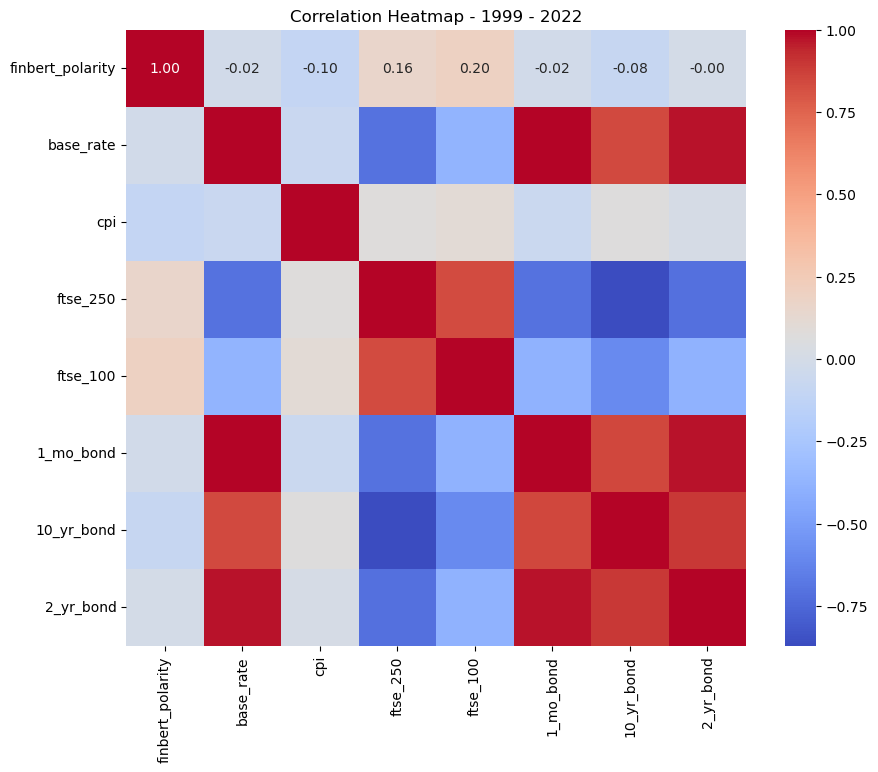

In [13]:
# Drop the 'date' column from the dataframe for the matrix
filtered_subset_boe = subset_boe.drop(['date','boe_speech'],axis=1)

# Calculate the correlation matrix
correlation_matrix_orig = filtered_subset_boe.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_orig, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - 1999 - 2022')
# Save the figure as a PNG file
plt.savefig('correlation_heatmap_all.png', bbox_inches='tight')
plt.show()

## Correlation heatmap of Effective Lower Bound period (5th March 2009 - 4th May 2022)

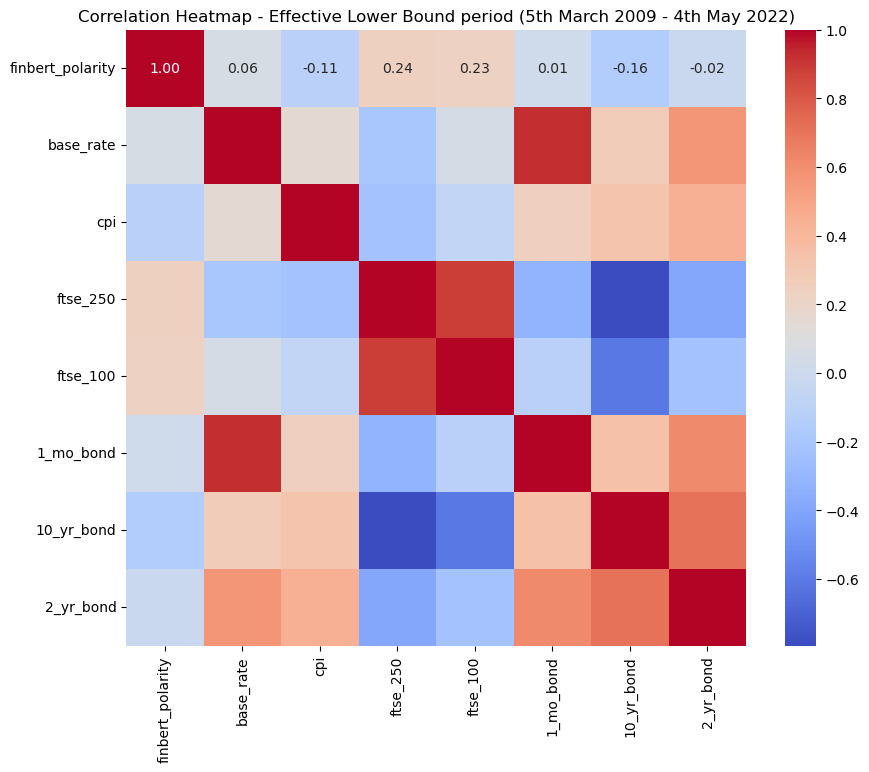

In [14]:
# Drop the 'date' and 'boe_speech' columns from the dataframe for the matrix
filtered_subset_boe_elb = subset_boe_elb.drop(['date', 'boe_speech'], axis=1)

# Calculate the correlation matrix
correlation_matrix_elb = filtered_subset_boe_elb.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_elb, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Effective Lower Bound period (5th March 2009 - 4th May 2022)')

# Save the figure as a PNG file
plt.savefig('correlation_heatmap_elb.png', bbox_inches='tight')

# Show the plot
plt.show()

## Correlation heatmap of Hiking Cycle period (4th May 2022 - 31st December 2022 )

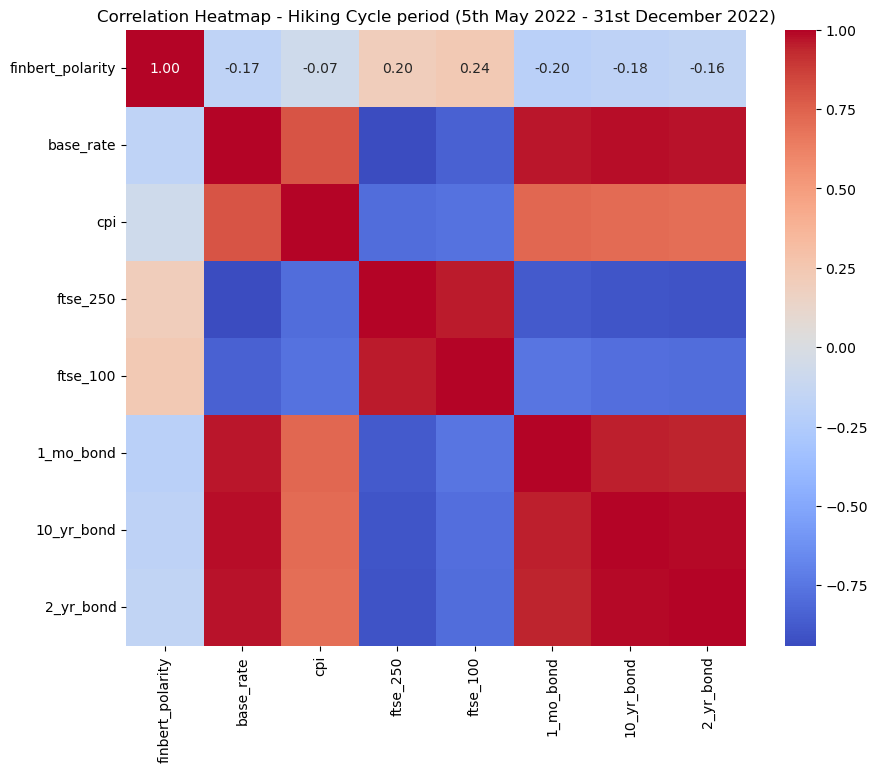

In [15]:
# Drop the 'date' column from the dataframe for the matrix
filtered_subset_boe_hc = subset_boe_hc.drop(['date','boe_speech'],axis=1)

# Calculate the correlation matrix
correlation_matrix_hc = filtered_subset_boe_hc.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_hc, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Hiking Cycle period (5th May 2022 - 31st December 2022)')
# Save the figure as a PNG file
plt.savefig('correlation_heatmap_hc.png', bbox_inches='tight')
plt.show()

## Observations

- **Correlation between FinBERT polarity and the FTSE:**  Slight correlation can be noted between FinBERT polarity and the FSTE 100 and 250 across all three heatmaps, with the highest scores during the Effective Lower Bound period, followed by the Hiking Cycle. It is interesting to note that the correlation scores are slightly higher during these two periods where base rates are at either side of extremes.
- **Correlation between the base rate and bond prices**: Correlation between the base rate and bond prices (1 month, 2 year and 10 year) is extremely visible, with the strongest correlations seen during the hiking cycle. This is then followed by the heatmap for the entire time period between 1999 - 2022, and lastly by the period of the Effective Lower Bound, where strong correlation can still be seen for the 1 month bond prices.
- **Correlation between CPI and bond prices**: A mild correlation between CPI and bon prices was also observed, potentially moving hand in hand with base rate movements.
- **Correlation between CPI and base rate**: Interestingly, in the heatmap during the hiking cycle period, there appears to be a relatively strong correlation between the base rate and CPI. This may be due to the fact that base rates were being pushed upwards to tame the rising inflation rate. 

By splitting the time periods into regimes and running separate heatmaps, it was interesting to note both similarities as well as differences in correlation in each. It would be recommended that the Client further explores this method of analysis if not already done, in order to identify any trends that can help the Bank understand and predict market behaviour. 